## calibration Metrics
- Reliability Plot
- Calibration error
    - Expected Calibration Error
    - Maximum Calibration Error

## Classification Problems

In [25]:
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [113]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
x_train = train_images.reshape(60000, 28, 28, 1) / 255
x_test = test_images.reshape(10000, 28, 28, 1) / 255
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
 
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=50)


Epoch 1/10
1200/1200 [==============================] - 19s 15ms/step - loss: 0.1442 - accuracy: 0.9573 - val_loss: 0.0498 - val_accuracy: 0.9836
Epoch 2/10
1200/1200 [==============================] - 16s 13ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0373 - val_accuracy: 0.9867
Epoch 3/10
1200/1200 [==============================] - 17s 14ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0452 - val_accuracy: 0.9855
Epoch 4/10
1200/1200 [==============================] - 16s 13ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0305 - val_accuracy: 0.9897
Epoch 5/10
1200/1200 [==============================] - 15s 13ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0314 - val_accuracy: 0.9895
Epoch 6/10
1200/1200 [==============================] - 16s 13ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0454 - val_accuracy: 0.9854
Epoch 7/10
1200/1200 [==============================] - 17s 14ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0334 -

In [115]:
pred_prob =  model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [116]:
pred_prob.shape

(10000, 10)

In [117]:
pred_prob[0:5]

array([[8.8623185e-15, 7.7290850e-15, 3.7685892e-14, 3.3387166e-13,
        6.4189370e-12, 1.3101256e-14, 5.2095401e-19, 1.0000000e+00,
        7.0114633e-18, 1.0656221e-11],
       [2.2383554e-13, 2.0079914e-17, 1.0000000e+00, 8.1895792e-24,
        4.0223398e-17, 1.0789862e-25, 4.0506915e-15, 1.3660227e-18,
        1.5102185e-15, 3.3762423e-21],
       [4.0239635e-11, 9.9999988e-01, 1.9669040e-10, 1.3267930e-14,
        3.8770093e-08, 2.7589897e-10, 4.4474993e-11, 1.5874892e-07,
        4.2385821e-08, 1.7766032e-11],
       [1.0000000e+00, 2.4252330e-18, 6.1407192e-14, 5.9312006e-17,
        7.9221827e-17, 2.5449842e-14, 3.7727990e-09, 1.5739337e-13,
        1.0898967e-14, 2.6602240e-12],
       [4.3250332e-13, 1.6484477e-12, 2.7009978e-13, 1.3435741e-13,
        9.9999845e-01, 2.0681410e-12, 2.0109830e-12, 5.0541474e-11,
        2.4557455e-11, 1.4938275e-06]], dtype=float32)

In [118]:
confidences=np.max(pred_prob,axis=1)
confidences[0:5]

array([1.        , 1.        , 0.9999999 , 1.        , 0.99999845],
      dtype=float32)

In [119]:
np.argmax(pred_prob[0:10],axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [120]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [121]:
import numpy as np
pred_labels = np.argmax(pred_prob,axis=1)

In [122]:
pred_label.shape

(10000,)

In [123]:
scores = compute_calibration(test_labels, pred_labels, confidences, num_bins=10)

C:\Users\uid38717\AppData\Local\Temp\ipykernel_8228\2767785863.py:31: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\uid38717\AppData\Local\Temp\ipykernel_8228\2767785863.py:32: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\uid38717\AppData\Local\Temp\ipykernel_8228\2767785863.py:33: DeprecationWarning:

`np.int` is a dep

In [124]:
scores

{'accuracies': array([0.        , 0.        , 0.        , 1.        , 0.66666667,
        0.57894737, 0.60869565, 0.65625   , 0.7037037 , 0.99493312]),
 'confidences': array([0.        , 0.        , 0.        , 0.35855955, 0.47192821,
        0.55987436, 0.64223826, 0.75309449, 0.85707748, 0.99940068]),
 'counts': array([   0,    0,    0,    1,    3,   19,   23,   32,   54, 9868]),
 'bins': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'avg_accuracy': 0.9905,
 'avg_confidence': 0.9959650508433581,
 'expected_calibration_error': 0.0057826594561338285,
 'max_calibration_error': 0.6414404511451721}

In [125]:
import os
plot_single_calibration_curves(scores,confidences,calib_curve_name="reliability_diagram",hist_name="histogram")

[0.         0.         0.         0.35855955 0.47192821 0.55987436
 0.64223826 0.75309449 0.85707748 0.99940068]
[0.         0.         0.         1.         0.66666667 0.57894737
 0.60869565 0.65625    0.7037037  0.99493312]


In [37]:
    true_labels = test_labels
    num_bins = 10
    assert len(confidences) == len(pred_labels)
    assert len(confidences) == len(true_labels)
    assert num_bins > 0

In [38]:
    bin_size = 1.0 / num_bins
    bins = np.linspace(0.0, 1.0, num_bins + 1)
    indices = np.digitize(confidences, bins, right=True)

In [40]:
bin_size, bins

(0.1, array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [47]:
indices[0:20], confidences[0:20]

(array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10,  6, 10], dtype=int64),
 array([1.        , 1.        , 1.        , 1.        , 0.9999087 ,
        1.        , 0.9999982 , 1.        , 0.99884367, 0.999982  ,
        1.        , 1.        , 0.9999963 , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.56444937, 1.        ],
       dtype=float32))

In [52]:
b=5
selected = np.where(indices == b + 1)[0]

In [53]:
selected

array([  18,  448,  726, 1033, 1299, 1393, 1681, 1717, 1982, 2720, 3005,
       3060, 3129, 3225, 3236, 4007, 4699, 4860, 5331, 5600, 5634, 6651,
       9015, 9158, 9642, 9839], dtype=int64)

In [2]:
#! pip install uncertainty_toolbox

In [3]:
import uncertainty_toolbox.viz as uvi

In [4]:
def compute_calibration(true_labels, pred_labels, confidences, num_bins=10):
    """Collects predictions into bins used to draw a reliability diagram.
    function taken from : https://github.com/hollance/reliability-diagrams/blob/master/reliability_diagrams.py
    Arguments:
        true_labels: the true labels for the test examples
        pred_labels: the predicted labels for the test examples
        confidences: the predicted confidences for the test examples
        num_bins: number of bins
    The true_labels, pred_labels, confidences arguments must be NumPy arrays;
    pred_labels and true_labels may contain numeric or string labels.
    For a multi-class model, the predicted label and confidence should be those
    of the highest scoring class.
    Returns a dictionary containing the following NumPy arrays:
        accuracies: the average accuracy for each bin
        confidences: the average confidence for each bin
        counts: the number of examples in each bin
        bins: the confidence thresholds for each bin
        avg_accuracy: the accuracy over the entire test set
        avg_confidence: the average confidence over the entire test set
        expected_calibration_error: a weighted average of all calibration gaps
        max_calibration_error: the largest calibration gap across all bins
    """
    assert len(confidences) == len(pred_labels)
    assert len(confidences) == len(true_labels)
    assert num_bins > 0

    bin_size = 1.0 / num_bins
    bins = np.linspace(0.0, 1.0, num_bins + 1)
    indices = np.digitize(confidences, bins, right=True)

    bin_accuracies = np.zeros(num_bins, dtype=np.float)
    bin_confidences = np.zeros(num_bins, dtype=np.float)
    bin_counts = np.zeros(num_bins, dtype=np.int)

    for b in range(num_bins):
        selected = np.where(indices == b + 1)[0]
        if len(selected) > 0:
            bin_accuracies[b] = np.mean(true_labels[selected] == pred_labels[selected])
            bin_confidences[b] = np.mean(confidences[selected])
            bin_counts[b] = len(selected)

    avg_acc = np.sum(bin_accuracies * bin_counts) / np.sum(bin_counts)
    avg_conf = np.sum(bin_confidences * bin_counts) / np.sum(bin_counts)

    gaps = np.abs(bin_accuracies - bin_confidences)
    ece = np.sum(gaps * bin_counts) / np.sum(bin_counts)
    mce = np.max(gaps)

    return {
        "accuracies": bin_accuracies,
        "confidences": bin_confidences,
        "counts": bin_counts,
        "bins": bins,
        "avg_accuracy": avg_acc,
        "avg_confidence": avg_conf,
        "expected_calibration_error": ece,
        "max_calibration_error": mce,
    }

In [111]:
def plot_single_calibration_curves(scores,confidences,calib_curve_name="reliability_diagram",hist_name="histogram"):
    fig_1 = go.Figure()
    fig_2 = go.Figure()
    
    print(scores["confidences"])
    print(scores["accuracies"])


    fig1_trace1=go.Scattergl(x = [0,1], y = [0,1], name = 'perfectly_calibrated', mode = 'lines+markers')
    fig1_trace2=go.Scattergl(x = scores["confidences"], y = scores["accuracies"], name = "not calibrated", mode = 'lines+markers')
    fig_1.add_trace(fig1_trace1)

    fig_1.add_trace(fig1_trace2)

    fig_1.update_layout(
            title="Calibration Curve",
            xaxis_title="Predicted_confidence",
            yaxis_title="Expected_accuracy"
        )        
    #filename=os.path.join(exp_name,'{}.html'.format(calib_curve_name))
    #plotly.offline.plot(fig_1, filename = filename)
    fig_1.show()

    bin_start=scores["bins"][0]
    bin_end=scores["bins"][-1]
    bin_width=0.1 #scores["bins"][1]-scores["bins"][0]
    bin_prop={"start":bin_start,"end":bin_end,"size":bin_width}
   
    counts = scores["counts"]
    bins = scores["bins"]

    bin_size = 1.0 / len(counts)
    positions = bins[:-1] + bin_size/2.0
    #positions=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    fig2_trace1=go.Histogram(x=confidences,opacity=0.8,name='confidence histogram', nbinsx=10)  #xbins=bin_prop) #nbinsx=10)
   
    fig2_trace1 = go.Bar(x = positions,y = counts)
    #fig = go.Figure(data=data)
    fig_2.add_trace(fig2_trace1)

    fig2_trace2=go.Scatter(x=[scores["avg_confidence"],scores["avg_confidence"]], y=[0,max(scores['counts'])+2], 
                             mode='lines', 
                             line=dict(color='green', width=5, dash='dash'),
                             name='avg conf: {}'.format(np.round(scores["avg_confidence"],3)))
    fig2_trace3=go.Scatter(x=[scores["avg_accuracy"],scores["avg_accuracy"]], y=[0,max(scores['counts'])+2], 
                             mode='lines', 
                             line=dict(color='black', width=5, dash='solid'),
                             name='avg acc: {}'.format(scores["avg_accuracy"]))
    fig_2.add_trace(fig2_trace2)
    fig_2.add_trace(fig2_trace3)

    fig_2.update_layout(title="Histogram",xaxis_title="predicted_confidence",yaxis_title="num_samples",)

    #filename2=os.path.join(exp_name,'{}.html'.format(hist_name))
    #plotly.offline.plot(fig_2, filename = filename2)
    fig_2.show()

In [108]:
positions=np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
positions=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [112]:
plot_single_calibration_curves(scores,confidences,calib_curve_name="reliability_diagram",hist_name="histogram")

[0.         0.         0.         0.         0.47580668 0.54877436
 0.64885032 0.75892317 0.85337895 0.99966729]
[0.         0.         0.         0.         0.         0.4375
 0.5        0.56521739 0.46153846 0.99516422]


In [83]:
bin_size*0.9

0.09000000000000001

In [88]:
scores

{'accuracies': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.4375    , 0.5       , 0.56521739, 0.46153846, 0.99516422]),
 'confidences': array([0.        , 0.        , 0.        , 0.        , 0.47580668,
        0.54877436, 0.64885032, 0.75892317, 0.85337895, 0.99966729]),
 'counts': array([   0,    0,    0,    0,    1,   16,    8,   23,   26, 9926]),
 'bins': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'avg_accuracy': 0.9914,
 'avg_confidence': 0.9976787574261426,
 'expected_calibration_error': 0.006278757426142701,
 'max_calibration_error': 0.47580668330192566}

In [89]:
positions

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [93]:
import matplotlib.pyplot as plt

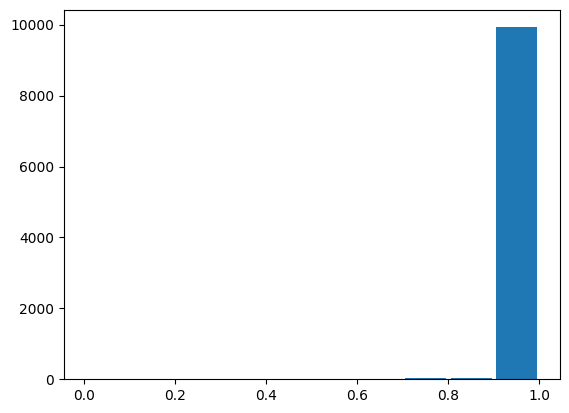

In [95]:
    counts = scores["counts"]
    bins = scores["bins"]

    bin_size = 1.0 / len(counts)
    positions = bins[:-1] + bin_size/2.0

    fig = plt.bar(positions, counts,width=bin_size * 0.9)
    #fig.show()

In [97]:
    fig = px.bar(positions, counts) #,width=bin_size * 0.9)
    fig.show()

In [99]:
import plotly.graph_objs as go
#langs = ['C', 'C++', 'Java', 'Python', 'PHP']
#students = [23,17,35,29,12]
data = [go.Bar(
   x = positions,
   y = counts
)]
fig = go.Figure(data=data)
#iplot(fig)
fig.show()

In [80]:
#fig = px.bar(scores["bins"], scores["counts"])

ValueError: All arguments should have the same length. The length of argument `y` is 11, whereas the length of  previously-processed arguments ['x'] is 10

In [33]:
scores = plot_single_calibration_curves(scores,confidences,calib_curve_name="reliability_diagram",hist_name="histogram")

TypeError: 'NoneType' object is not subscriptable

In [34]:
scores

In [ ]:
    bin_start=scores["bins"][0]
    bin_end=scores["bins"][-1]+0.1
    bin_width=0.1 #scores["bins"][1]-scores["bins"][0]
    bin_prop={"start":bin_start,"end":bin_end,"size":bin_width}